# Sales Performance Analysis with Walmart Data

Focus:
Exploring the dataset using pandas functions
Practicing groupby(), merge(), join(), and concat()
Objective:
Analyze sales performance across different stores and departments. Use groupby to find trends and combine data using merging and concatenation techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
train = pd.read_csv('train.csv')

In [4]:
print( train.shape)

(421570, 5)


In [6]:
print("\nTrain data columns:", train.columns.tolist())


Train data columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']


In [7]:
features = pd.read_csv('features.csv')

In [8]:
print("Features data shape:", features.shape)

Features data shape: (8190, 12)


In [9]:
print("Features data columns:", features.columns.tolist())

Features data columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


In [10]:
stores = pd.read_csv('stores.csv')

In [11]:
print("Stores data shape:", stores.shape)

Stores data shape: (45, 3)


In [12]:
print("Stores data columns:", stores.columns.tolist())

Stores data columns: ['Store', 'Type', 'Size']


In [13]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [14]:
print(train.describe())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


In [15]:
print(train['Dept'].value_counts().head(10))

Dept
1     6435
2     6435
3     6435
4     6435
7     6435
8     6435
16    6435
13    6435
10    6435
14    6435
Name: count, dtype: int64


In [16]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [17]:
print(stores['Type'].value_counts())

Type
A    22
B    17
C     6
Name: count, dtype: int64


In [18]:
print("\nMissing values in train:", train.isnull().sum())


Missing values in train: Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [19]:
print("Missing values in features:", features.isnull().sum())

Missing values in features: Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [20]:
print("Missing values in stores:", stores.isnull().sum())

Missing values in stores: Store    0
Type     0
Size     0
dtype: int64


In [21]:
features.fillna(0, inplace=True)

In [23]:
train['Date'] = pd.to_datetime(train['Date'])
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [24]:
features['Date'] = pd.to_datetime(features['Date'])
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,False


In [28]:
salesbyStore = train.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("\nTotal sales by store:")
print(salesbyStore.head())


Total sales by store:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [29]:
avgSalesbyDept = train.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)
print("\nAverage sales by department:")
print(avgSalesbyDept.head())


Average sales by department:
Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
Name: Weekly_Sales, dtype: float64


In [30]:
train['Month'] = train['Date'].dt.month
monthlySales = train.groupby('Month')['Weekly_Sales'].sum()
print("\nMonthly sales trends:")
print(monthly_sales)


Monthly sales trends:
Month
1     3.325984e+08
2     5.687279e+08
3     5.927859e+08
4     6.468598e+08
5     5.571256e+08
6     6.226299e+08
7     6.500010e+08
8     6.130902e+08
9     5.787612e+08
10    5.847848e+08
11    4.130157e+08
12    5.768386e+08
Name: Weekly_Sales, dtype: float64


In [31]:
trainWstore = pd.merge(train, stores, on='Store', how='left')
print("\nTrain data merged with store info:")
print(trainWstore.head())


Train data merged with store info:
   Store  Dept       Date  Weekly_Sales  IsHoliday  Month Type    Size
0      1     1 2010-02-05      24924.50      False      2    A  151315
1      1     1 2010-02-12      46039.49       True      2    A  151315
2      1     1 2010-02-19      41595.55      False      2    A  151315
3      1     1 2010-02-26      19403.54      False      2    A  151315
4      1     1 2010-03-05      21827.90      False      3    A  151315


In [32]:
fullData = pd.merge(trainWstore, features, on=['Store', 'Date'], how='left')
print("\nFull merged dataset:")
print(fullData.head())


Full merged dataset:
   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Month Type    Size  \
0      1     1 2010-02-05      24924.50        False      2    A  151315   
1      1     1 2010-02-12      46039.49         True      2    A  151315   
2      1     1 2010-02-19      41595.55        False      2    A  151315   
3      1     1 2010-02-26      19403.54        False      2    A  151315   
4      1     1 2010-03-05      21827.90        False      3    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        0.0        0.0        0.0        0.0   
1        38.51       2.548        0.0        0.0        0.0        0.0   
2        39.93       2.514        0.0        0.0        0.0        0.0   
3        46.63       2.561        0.0        0.0        0.0        0.0   
4        46.50       2.625        0.0        0.0        0.0        0.0   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        0.0  211.0963

In [34]:
salesbyType = fullData.groupby('Type')['Weekly_Sales'].sum().sort_values(ascending=False)
print("\nSales by store type:")
print(salesbyType)


Sales by store type:
Type
A    4.331015e+09
B    2.000701e+09
C    4.055035e+08
Name: Weekly_Sales, dtype: float64


In [35]:
correlation = fullData[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
print("\nCorrelation matrix:")
print(correlation['Weekly_Sales'].sort_values(ascending=False))


Correlation matrix:
Weekly_Sales    1.000000
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64


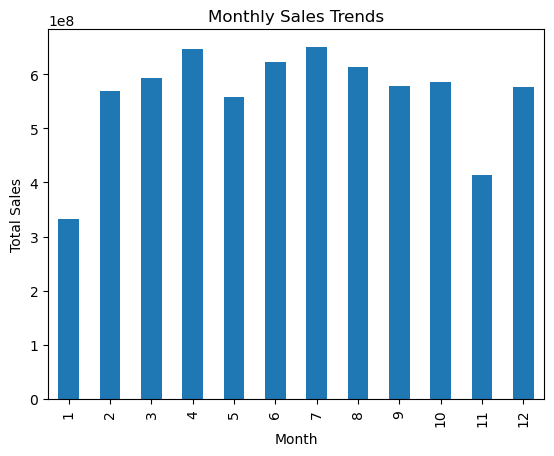

In [36]:
monthly_sales.plot(kind='bar', title='Monthly Sales Trends')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

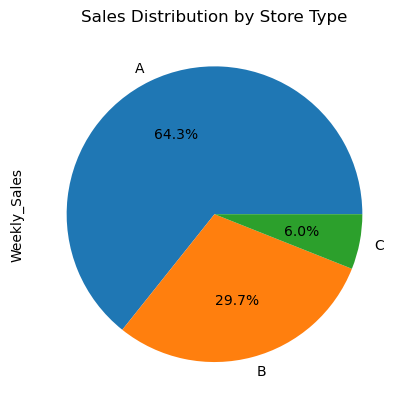

In [38]:
salesbyType.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Store Type')
plt.show()